<a href="https://colab.research.google.com/github/adeeshajayasinghe/DL-models/blob/main/cnn_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4910094611_8c7170fc95_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15977362155_461030c196_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14019883858_e5d2a0ec10_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4267024012_295e7141a3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/898102603_2d5152f09a.jpg')]

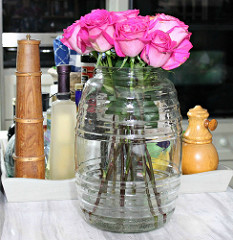

In [6]:
PIL.Image.open(str(roses[1]))

In [7]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [8]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/4910094611_8c7170fc95_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15977362155_461030c196_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14019883858_e5d2a0ec10_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4267024012_295e7141a3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/898102603_2d5152f09a.jpg')]

In [9]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [10]:
# convert image into a numpy array
img = cv2.imread(flowers_images_dict['roses'][0])
img.shape

(240, 320, 3)

In [11]:
# Change the dimension of an image
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [12]:
# Add all togther
X, y = [], []
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(image)
    resized_img = cv2.resize(img, (180, 180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [13]:
X = np.array(X)
y = np.array(y)
X.shape, y.shape

((3670, 180, 180, 3), (3670,))

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
X_train.shape, y_train.shape

((2752, 180, 180, 3), (2752,))

In [16]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [17]:
# Build the cnn
cnn = Sequential([
    # cnn
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # dense
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

cnn.compile(optimizer='adam',
            loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.2382 - loss: 224.7970
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4517 - loss: 1.3961
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5950 - loss: 1.1017
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5955 - loss: 1.0983
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6880 - loss: 0.8328
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7815 - loss: 0.6158
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8034 - loss: 0.5447
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8703 - loss: 0.3958
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8948 - loss: 0.3058
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9094 - loss: 0.2607


In [18]:
cnn.evaluate(X_test, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4016 - loss: 4.0179


[3.470804452896118, 0.42810457944869995]

In [19]:
# You can see the model has overfitted
# Now use data augmentation to avoid overfit

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.3)
])

In [20]:
# Build the cnn
cnn = Sequential([
    # cnn
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    # dense
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

cnn.compile(optimizer='adam',
            loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.2394 - loss: 84.5409
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.3676 - loss: 1.4611
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.3982 - loss: 1.4069
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4420 - loss: 1.3147
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4311 - loss: 1.3182
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.4241 - loss: 1.3397
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.4925 - loss: 1.2481
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.5214 - loss: 1.1979
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5196 - loss: 1.1933
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5231 - loss: 1.1571
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5247 - loss: 1.1587
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy

In [22]:
cnn.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2473 - loss: 3.6104


[3.585207223892212, 0.24618735909461975]